<a href="https://colab.research.google.com/github/SahilSuvarna1023/StockMarketAnalysis/blob/main/Stock_Market_Data_from_Yahoo_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Install yfinance if you don't have it installed
!pip install yfinance --upgrade --no-cache-dir


import yfinance as yf

# Fetch historical stock data for Apple (AAPL)
stock_data = yf.download('AAPL', start='2010-01-01', end='2025-01-01')

# Save the dataset to CSV
stock_data.to_csv('AAPL_stock_data.csv')

# Display the first few rows of the dataset
stock_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.447412,6.462174,6.398305,6.429938,493729600
2010-01-05,6.458560,6.495013,6.424516,6.465188,601904800
2010-01-06,6.355827,6.484167,6.349199,6.458559,552160000
2010-01-07,6.344076,6.386857,6.297982,6.379325,477131200
2010-01-08,6.386256,6.386859,6.298287,6.335643,447610800


[*********************100%***********************]  1 of 1 completed


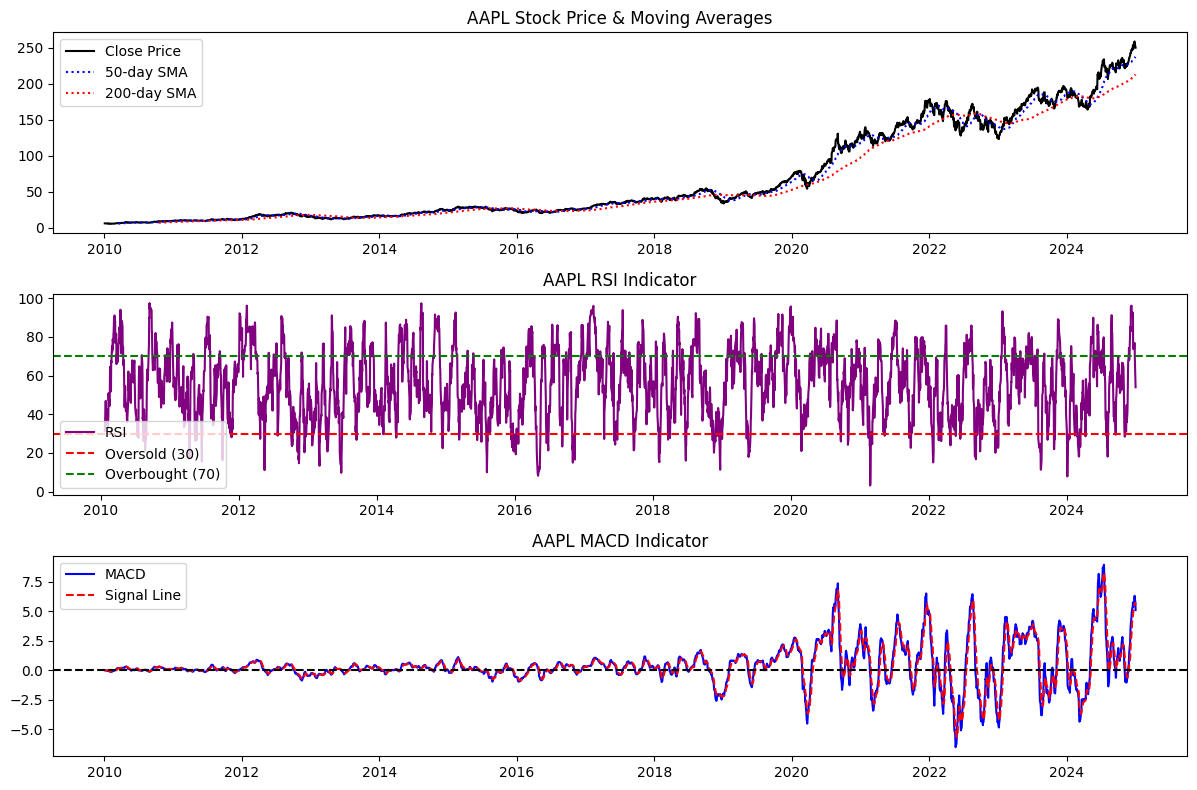

In [11]:
# Step 1: Import necessary libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Fetch the stock data
stock_symbol = 'AAPL'  # Change the ticker if needed
start_date = '2010-01-01'
end_date = '2025-01-01'

# Fetch data using yfinance
data = yf.download(stock_symbol, start=start_date, end=end_date)

# Step 3: Compute Technical Indicators

# Simple Moving Averages (SMA)
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Exponential Moving Averages (EMA)
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()
data['EMA_200'] = data['Close'].ewm(span=200, adjust=False).mean()

# Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff(1)  # Price changes
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Moving Average Convergence Divergence (MACD)
data['MACD'] = data['Close'].ewm(span=12, adjust=False).mean() - data['Close'].ewm(span=26, adjust=False).mean()
data['MACD_Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Step 4: Plot the stock data and technical indicators
plt.figure(figsize=(12, 8))

# Plot stock price and moving averages
plt.subplot(3, 1, 1)
plt.plot(data['Close'], label='Close Price', color='black')
plt.plot(data['SMA_50'], label='50-day SMA', linestyle='dotted', color='blue')
plt.plot(data['SMA_200'], label='200-day SMA', linestyle='dotted', color='red')
plt.title(f'{stock_symbol} Stock Price & Moving Averages')
plt.legend()

# Plot RSI
plt.subplot(3, 1, 2)
plt.plot(data['RSI'], label='RSI', color='purple')
plt.axhline(30, linestyle='--', color='red', label='Oversold (30)')
plt.axhline(70, linestyle='--', color='green', label='Overbought (70)')
plt.title(f'{stock_symbol} RSI Indicator')
plt.legend()

# Plot MACD
plt.subplot(3, 1, 3)
plt.plot(data['MACD'], label='MACD', color='blue')
plt.plot(data['MACD_Signal'], label='Signal Line', linestyle='dashed', color='red')
plt.axhline(0, linestyle='--', color='black')
plt.title(f'{stock_symbol} MACD Indicator')
plt.legend()

plt.tight_layout()
plt.show()

# Step 5: Display the last few rows of data
print(data.tail())